<a href="https://colab.research.google.com/github/TaniaR078/Latihan2_Pyhton/blob/main/AB_NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Ekplorasi Data Awal

In [ ]:
# Load data kita ke sebuah dataframe
data = pd.read_excel('AB_NYC_2019.xlsx')

In [ ]:
# tampilkan jumlah baris dan data
data.shape

(5018, 15)

In [ ]:
# tampilkan 10 baris pertama
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0
5,19054683,Fully-furnished modern apartment,97907084,Kim,Bronxx,Wakefield,40.90281,-73.85201,Entire home/apt,28.0,1,NaN,NaT,NaN,0
6,36243183,Spacious private room #2,35783912,Pi & Leo,Bronxx,Fordham,40.86264,-73.89139,Private room,29.0,2,NaN,NaT,NaN,81
7,33528562,"Private, warm & inviting contemporary space.",252641467,Antoinette,Bronx,Wakefield,40.88491,-73.85484,Private room,33.0,1,NaN,NaT,NaN,116
8,18442048,Clean-N-Comfy Bronx Pad,25385574,Che,Bronx,Allerton,40.86718,-73.86235,Private room,33.0,1,NaN,NaT,NaN,179
9,36243240,spacious private room #3,35783912,Pi & Leo,Bronx,Fordham,40.86263,-73.89088,Private room,33.0,2,NaN,NaT,NaN,84


# DATA CLEANING

## 1. Pengecekan Missing Value

In [ ]:
# lihat informasi dari data kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5018 entries, 0 to 5017
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5018 non-null   int64         
 1   name                 5017 non-null   object        
 2   host_id              5018 non-null   int64         
 3   host_name            5016 non-null   object        
 4   neighbourhood_group  5018 non-null   object        
 5   neighbourhood        5018 non-null   object        
 6   latitude             5018 non-null   float64       
 7   longitude            5018 non-null   float64       
 8   room_type            5018 non-null   object        
 9   price                4966 non-null   float64       
 10  minimum_nights       5018 non-null   int64         
 11  number_of_reviews    4143 non-null   float64       
 12  last_review          4143 non-null   datetime64[ns]
 13  reviews_per_month    4143 non-nul

Terdapat 6 kolom yang memiliki missing value. kita akan incestigasi lebih lanjut

In [ ]:
# hitung jumlah missing value di tiap kolom
data.isna().sum()

id                       0
name                     1
host_id                  0
host_name                2
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                   52
minimum_nights           0
number_of_reviews      875
last_review            875
reviews_per_month      875
availability_365         0
dtype: int64

In [ ]:
# hitung proporsi missing value di tiap kolom
(data.isna().sum() / data.shape[0]) * 100

id                      0.000000
name                    0.019928
host_id                 0.000000
host_name               0.039857
neighbourhood_group     0.000000
neighbourhood           0.000000
latitude                0.000000
longitude               0.000000
room_type               0.000000
price                   1.036269
minimum_nights          0.000000
number_of_reviews      17.437226
last_review            17.437226
reviews_per_month      17.437226
availability_365        0.000000
dtype: float64

In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di salah satu kolom
data[data['number_of_reviews'].isna()].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,34229869,Cozy Living Room Futon,27537930,Preston,Bronx,Pelham Gardens,40.86209,-73.84667,Shared room,20.0,1,NaN,NaT,NaN,5
1,31568673,Large private room w/ 2 built-in closets,236631469,Paloma,Bronxx,Williamsbridge,40.88449,-73.86227,Private room,25.0,30,NaN,NaT,NaN,85
2,36199363,Furnished room for rent in Bronx SINGLE FEMALE,272247972,Kadeen,Bronxx,Olinville,40.88116,-73.86547,Shared room,25.0,90,NaN,NaT,NaN,190
3,34180340,Sunny & Spacious Room,181233778,Aishah,Bronxx,Belmont,40.85595,-73.88519,Private room,27.0,30,NaN,NaT,NaN,68
4,32364762,Bronx,19303369,Hiroki,Bronxx,Kingsbridge,40.88474,-73.90321,Private room,27.0,30,NaN,NaT,NaN,0


In [ ]:
data[(data['price'].isnull())].shape

(52, 15)

In [ ]:
# filter dataframe untuk menampilkan baris yang nilainya null di ketiga kolom sekaligus
data[(data['number_of_reviews'].isnull()) & (data['last_review'].isnull()) & (data['reviews_per_month'].isnull())].shape

(875, 15)

Jumlah missing value saat kita filter berdasarkan kedua kolom yang memiliki missing value ternyata sama dengan jumlah baris yang memiliki missing value. Artinya saat value di numer_of_reviews = NaN, maka value di last_review dan reviews_per_mont juga akan NaN.

jumlah missing value di dataset kita ada sekitar 17% dan data tersebut tidak berpengaruh ke column lain maka akan kita hapus untuk data yang missing value.

In [ ]:
# Menghapus kolom yang memiliki missing value
data = data.dropna(axis=0)

# Reset indeks
data = data.reset_index(drop=True)

In [ ]:
# cek apakah kita sudah berhasil menghapus data yang missing
data.isna().sum()

id                     0
name                   0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4099 non-null   int64         
 1   name                 4099 non-null   object        
 2   host_id              4099 non-null   int64         
 3   host_name            4099 non-null   object        
 4   neighbourhood_group  4099 non-null   object        
 5   neighbourhood        4099 non-null   object        
 6   latitude             4099 non-null   float64       
 7   longitude            4099 non-null   float64       
 8   room_type            4099 non-null   object        
 9   price                4099 non-null   float64       
 10  minimum_nights       4099 non-null   int64         
 11  number_of_reviews    4099 non-null   float64       
 12  last_review          4099 non-null   datetime64[ns]
 13  reviews_per_month    4099 non-nul

In [ ]:
data.shape

(4099, 15)

## 2. Pengecekan Duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Terdapat {data.duplicated().sum()} baris duplikat di data kita")

Terdapat 18 baris duplikat di data kita


In [ ]:
# hapus data duplikat
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# cek apakah kita sudah berhasil menghapus data duplikat
print(f"Terdapat {data.duplicated().sum()} baris duplikat di data kita")

Terdapat 0 baris duplikat di data kita


In [ ]:
data.shape

(4081, 15)

## 3. Pengecekan Typos

**Pengecekan kolom name**

In [ ]:
# kita lihat distribusi data di kolom kategorik name
data['name'].value_counts()

Hillside Hotel                                        7
Home away from home                                   5
Cozy home away from home                              3
New york Multi-unit building                          3
Prolonged Traveler's Dream (a month first & more)     3
                                                     ..
Very quiet two twin beds room 温馨双单人床小屋                1
NewPlace 4                                            1
Beautiful newly renovated home-Long stays welcome!    1
Private apartment (1st floor) with all amenities      1
Room near JFK Queen Bed                               1
Name: name, Length: 4038, dtype: int64

In [ ]:
# mari kita samakan value di kolom name menjadi lowercase
data['name'] = data['name'].str.lower()

In [ ]:
# lakukan pengecekan kembali ke kolom name
data['name'].value_counts()

home away from home                                    7
hillside hotel                                         7
home sweet home                                        3
prolonged traveler's dream (a month first & more)      3
步行9分钟到法拉盛缅街中心的电梯房,提供免费矿泉水可乐                            3
                                                      ..
简单的四房一厅两卫生间,位于北上远离开辆,走路四分钟到地铁站,交通便利\nsimple bigroom    1
very quiet two twin beds room 温馨双单人床小屋                 1
newplace 4                                             1
beautiful newly renovated home-long stays welcome!     1
room near jfk queen bed                                1
Name: name, Length: 4020, dtype: int64

**Pengecekan kolom host_name**

In [ ]:
# kita lihat distribusi data di kolom kategorik host_name
data['host_name'].value_counts()

David             35
John              34
Kazuya            23
Maria             22
Mark              19
                  ..
Howard             1
Darlene            1
George & Kevin     1
Asaf               1
Kenneth            1
Name: host_name, Length: 1845, dtype: int64

**Pengecekan Kolom neighbourhood_group**

In [ ]:
# kita lihat distribusi data di kolom kategorik neighbourhood_group
data['neighbourhood_group'].value_counts()

Queens       2797
Brooklyn      612
Bronx         595
Brooklynn      31
QUeens         25
Bronxx         21
Name: neighbourhood_group, dtype: int64

In [ ]:
# kita dapat berasumsi bahwa terdapat typo saat data neighbourhood_group di input
# dimana terdapat Brooklynn, QUeens, Bronxx
# mari kita replace kategorik tersebut
data['neighbourhood_group'] = data['neighbourhood_group'].replace({'Brooklynn': 'Brooklyn', 'QUeens': 'Queens', 'Bronxx': 'Bronx'})

In [ ]:
data['neighbourhood_group'].value_counts()

Queens      2822
Brooklyn     643
Bronx        616
Name: neighbourhood_group, dtype: int64

**Pengecekan Kolom neighbourhood**

In [ ]:
# kita lihat distribusi data di kolom kategorik neighbourhood
data['neighbourhood'].value_counts()

Flushing         362
Bushwick         209
Jamaica          190
Elmhurst         190
East New York    186
                ... 
Olinville          2
Castle Hill        2
Riverdale          1
Sunnyside          1
Crown Heights      1
Name: neighbourhood, Length: 98, dtype: int64

**Pengecekan Kolom room_type**

In [ ]:
# kita lihat distribusi data di kolom kategorik room_type
data['room_type'].value_counts()

Private room       2442
Entire home/apt    1503
Shared room         136
Name: room_type, dtype: int64

**Pengecekan Kolom last_review**

In [ ]:
# kita lihat distribusi data di kolom kategori last_reviews
data['last_review'].value_counts()

2019-06-30    202
2019-06-23    186
2019-07-01    183
2019-07-07    167
2019-06-24    151
             ... 
2014-10-22      1
2018-04-12      1
2017-08-31      1
2017-05-08      1
2018-11-24      1
Name: last_review, Length: 608, dtype: int64

**Pengecekan Kolom Price**

In [ ]:
# kita lihat distribusi data di kolom kategorik price
data['price'].value_counts()

50.0     245
60.0     218
40.0     174
45.0     173
65.0     170
        ... 
235.0      1
309.0      1
509.0      1
475.0      1
184.0      1
Name: price, Length: 229, dtype: int64

**Pengecekan KOlom minimum_nights**

In [ ]:
# kita lihat distribusi data di kolom kategorik minimum_nights
data['minimum_nights'].value_counts()

 1     1655
 2     1188
 3      535
 4      166
 30     145
 5      132
 7      107
 6       32
 14      26
 28      13
 10      12
 29      12
 15      10
 20       7
 9        7
 60       5
 90       5
 21       5
 31       2
 25       2
 16       2
 18       2
-1        1
 11       1
 40       1
 27       1
 37       1
 8        1
 22       1
 26       1
 13       1
 35       1
 45       1
Name: minimum_nights, dtype: int64

In [ ]:
print("persentase distribusi data di kolom minimum_nights :")
data['minimum_nights'].value_counts(normalize=True) * 100

persentase distribusi data di kolom minimum_nights :


 1     40.553786
 2     29.110512
 3     13.109532
 4      4.067630
 30     3.553051
 5      3.234501
 7      2.621906
 6      0.784122
 14     0.637099
 28     0.318549
 10     0.294046
 29     0.294046
 15     0.245038
 20     0.171527
 9      0.171527
 60     0.122519
 90     0.122519
 21     0.122519
 31     0.049008
 25     0.049008
 16     0.049008
 18     0.049008
-1      0.024504
 11     0.024504
 40     0.024504
 27     0.024504
 37     0.024504
 8      0.024504
 22     0.024504
 26     0.024504
 13     0.024504
 35     0.024504
 45     0.024504
Name: minimum_nights, dtype: float64

In [ ]:
# kita dapat berasumsi bahwa terdapat typo saat data minimum_nights di input
# dimana terdapat ekstra tanda negatif (misal 1 menjadi -1)
# mari kita replace angka tersebut
data['minimum_nights'] = data['minimum_nights'].replace(-1, 1)

In [ ]:
# kita cek lagi data di kolom minimum_nights
data['minimum_nights'].value_counts()

1     1656
2     1188
3      535
4      166
30     145
5      132
7      107
6       32
14      26
28      13
10      12
29      12
15      10
20       7
9        7
60       5
90       5
21       5
31       2
25       2
16       2
18       2
8        1
11       1
40       1
27       1
37       1
22       1
26       1
13       1
35       1
45       1
Name: minimum_nights, dtype: int64

**Pengecekan Kolom Number_of_reviews**

In [ ]:
# kita lihat distribusi data di kolom kategorik number_of_reviews
data['number_of_reviews'].value_counts()

1.0      401
2.0      297
3.0      193
4.0      158
5.0      133
        ... 
206.0      1
205.0      1
202.0      1
201.0      1
629.0      1
Name: number_of_reviews, Length: 268, dtype: int64

**Pengecekan Kolom reviews_per_month**

In [ ]:
# kita lihat distribusi data di kolom kategorik reviews_per_month
data['reviews_per_month'].value_counts()

1.00     114
2.00      61
0.16      47
0.11      36
3.00      34
        ... 
9.50       1
10.05      1
10.60      1
9.15       1
14.58      1
Name: reviews_per_month, Length: 737, dtype: int64

**Pengecekan Kolom availability_365**

In [ ]:
# kita lihat distribusi data di kolom kategorik availability_365
data['availability_365'].value_counts()

0      576
365    159
90      55
89      54
364     51
      ... 
194      1
182      1
214      1
184      1
218      1
Name: availability_365, Length: 361, dtype: int64

## 4. Pengecekan Outlier

In [ ]:
# membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# lihat informasi dari data kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4081 non-null   int64         
 1   name                 4080 non-null   object        
 2   host_id              4081 non-null   int64         
 3   host_name            4081 non-null   object        
 4   neighbourhood_group  4081 non-null   object        
 5   neighbourhood        4081 non-null   object        
 6   latitude             4081 non-null   float64       
 7   longitude            4081 non-null   float64       
 8   room_type            4081 non-null   object        
 9   price                4081 non-null   float64       
 10  minimum_nights       4081 non-null   int64         
 11  number_of_reviews    4081 non-null   float64       
 12  last_review          4081 non-null   datetime64[ns]
 13  reviews_per_month    4081 non-nul

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom price
upper_price = cek_outlier('price', 'upper_bound')
lower_price = cek_outlier('price', 'lower_bound')
print(f"Jumlah total outlier di kolom price : {len(upper_price) + len(lower_price)}")

Jumlah total outlier di kolom price : 300


<Axes: >

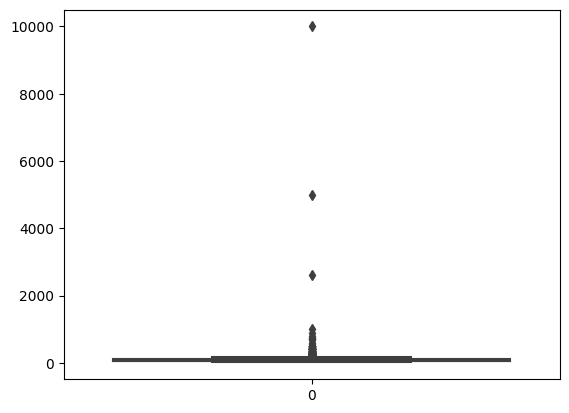

In [ ]:
# Membuat boxplot price
sns.boxplot(data['price'])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom minimum_nights
upper_minimum_nights = cek_outlier('minimum_nights', 'upper_bound')
lower_minimum_nights = cek_outlier('minimum_nights', 'lower_bound')
print(f"Jumlah total outlier di kolom minimum_nights : {len(upper_minimum_nights) + len(lower_minimum_nights)}")

Jumlah total outlier di kolom minimum_nights : 404


<Axes: >

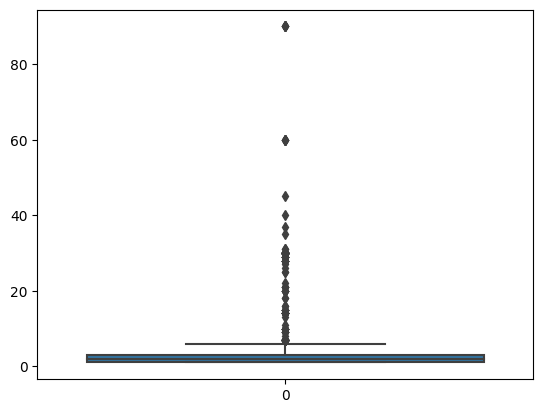

In [ ]:
# Membuat boxplot minimum_nights
sns.boxplot(data['minimum_nights'])


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom number_of_reviews
upper_number_of_reviews = cek_outlier('number_of_reviews', 'upper_bound')
lower_number_of_reviews = cek_outlier('number_of_reviews', 'lower_bound')
print(f"Jumlah total outlier di kolom number_of_reviewss : {len(upper_number_of_reviews) + len(lower_number_of_reviews)}")

Jumlah total outlier di kolom number_of_reviewss : 302


<Axes: >

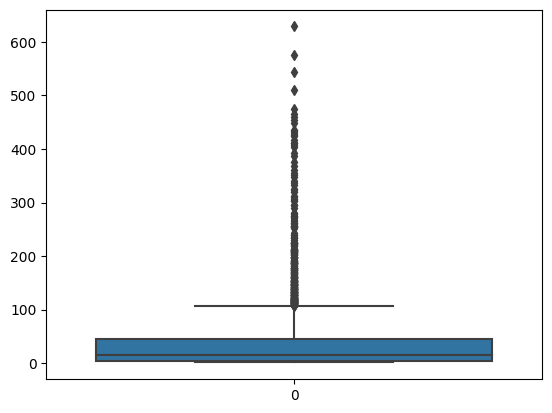

In [ ]:
# Membuat boxplot number_of_reviews
sns.boxplot(data['number_of_reviews'])

In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom last_review
upper_last_review = cek_outlier('last_review', 'upper_bound')
lower_last_review = cek_outlier('last_review', 'lower_bound')
print(f"Jumlah total outlier di kolom last_review : {len(upper_last_review) + len(lower_last_review)}")

Jumlah total outlier di kolom last_review : 662


In [ ]:
# jalankan fungsi untuk mendapatkan index data yang merupakan outlier
# kolom availability_365
upper_availability_365 = cek_outlier('availability_365', 'upper_bound')
lower_availability_365 = cek_outlier('availability_365', 'lower_bound')
print(f"Jumlah total outlier di kolom availability_365 : {len(upper_availability_365) + len(lower_availability_365)}")

Jumlah total outlier di kolom availability_365 : 0


karena nilai outlier cukup banyak maka kita akan melakukan imutasi data yang outlier dengan nilai median

In [ ]:
# simpan nilai median kedua kolom secara terpisah
median_price = data['price'].median()
median_minimum_nights = data['minimum_nights'].median()
median_number_of_reviews = data['number_of_reviews'].median()
print(f"Nilai median untuk kolom price : {median_price}")
print(f"Nilai median untuk kolom minimum_nights : {median_minimum_nights}")
print(f"Nilai median untuk kolom number_of_reviews : {median_number_of_reviews}")

Nilai median untuk kolom price : 65.0
Nilai median untuk kolom minimum_nights : 2.0
Nilai median untuk kolom number_of_reviews : 15.0


In [ ]:
# Mengganti outlier dengan nilai median kolom price
data.loc[data['price'] > 65.0, 'price'] = 65.0
print(data['price'].describe())

count    4081.000000
mean       56.489096
std        11.400956
min        10.000000
25%        49.000000
50%        65.000000
75%        65.000000
max        65.000000
Name: price, dtype: float64


In [ ]:
# Mengganti outlier dengan nilai median kolom minimum_nights
data.loc[data['minimum_nights'] > 2.0, 'minimum_nights'] = 2.0
print(data['minimum_nights'].describe())

count    4081.000000
mean        1.594217
std         0.491103
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: minimum_nights, dtype: float64


In [ ]:
# Mengganti outlier dengan nilai median kolom number_of_reviews
data.loc[data['number_of_reviews'] > 15.0, 'number_of_reviews'] = 15.0
print(data['number_of_reviews'].describe())

count    4081.000000
mean       10.267336
std         5.589366
min         1.000000
25%         4.000000
50%        15.000000
75%        15.000000
max        15.000000
Name: number_of_reviews, dtype: float64


In [ ]:
# final data
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
4076,546383,my little guest room in flushing,2680820,Linda,Queens,Flushing,40.75578,-73.81948,Private room,55.0,1,15.0,2019-05-25,5.53,332
4077,16276632,cozy room family home lga airport no cleaning fee,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48.0,1,15.0,2019-07-06,16.22,341
4078,8168619,steps away from laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46.0,1,15.0,2019-07-01,11.59,163
4079,10101135,room near jfk twin beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47.0,1,15.0,2019-06-27,13.40,173
4080,9145202,room near jfk queen bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47.0,1,15.0,2019-07-05,14.58,333


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4081 non-null   int64         
 1   name                 4080 non-null   object        
 2   host_id              4081 non-null   int64         
 3   host_name            4081 non-null   object        
 4   neighbourhood_group  4081 non-null   object        
 5   neighbourhood        4081 non-null   object        
 6   latitude             4081 non-null   float64       
 7   longitude            4081 non-null   float64       
 8   room_type            4081 non-null   object        
 9   price                4081 non-null   float64       
 10  minimum_nights       4081 non-null   int64         
 11  number_of_reviews    4081 non-null   float64       
 12  last_review          4081 non-null   datetime64[ns]
 13  reviews_per_month    4081 non-nul

## NO.1

Harga rata-rata, termurah dan termahal yang disediakan per jenis tipe kamar beserta karakteristiknya
Expected column output :
- tipe ruangan
- harga rata-rata
- harga max
- harga min
- rata-rata minimum pemesanan (malam)
- rata- rata total review

In [ ]:
# Menghitung harga rata-rata per jenis tipe kamar
harga_rata_rata = data.groupby('room_type')['price'].mean()
print(f"Nilai harga_rata_rata : {harga_rata_rata}")

Nilai harga_rata_rata : room_type
Entire home/apt    63.892216
Private room       52.881245
Shared room        39.455882
Name: price, dtype: float64


In [ ]:
# Menghitung harga maksimum perjenis tipe kamar
harga_max = data.groupby('room_type')['price'].max()
print(f"Nilai harga_max : {harga_max}")

Nilai harga_max : room_type
Entire home/apt    65.0
Private room       65.0
Shared room        65.0
Name: price, dtype: float64


In [ ]:
# Menghitung harga minimum perjenis tipe kamar
harga_min = data.groupby('room_type')['price'].min()
print(f"Nilai harga_min : {harga_min}")

Nilai harga_min : room_type
Entire home/apt    10.0
Private room       21.0
Shared room        15.0
Name: price, dtype: float64


In [ ]:
# Menghitung rata-rata minimum_nights berdasarkan tipe kamar
rata_rata_minimum_nights = data.groupby('room_type')['minimum_nights'].mean()
print(f"Nilai rata-rata_minimum_nights : {rata_rata_minimum_nights}")

Nilai rata-rata_minimum_nights : room_type
Entire home/apt    1.723220
Private room       1.524980
Shared room        1.411765
Name: minimum_nights, dtype: float64


In [ ]:
# Menghitung rata-rata total review berdasarkan tipe kamar
rata_rata_total_review = data.groupby('room_type')['number_of_reviews'].mean()
print(f"Nilai rata-rata_total_review : {rata_rata_total_review}")

Nilai rata-rata_total_review : room_type
Entire home/apt    11.005988
Private room        9.968878
Shared room         7.463235
Name: number_of_reviews, dtype: float64


In [ ]:
# Membuat dataframe Output
Output = pd.DataFrame({'room_type': harga_rata_rata.index,
                       'harga_rata_rata': harga_rata_rata.values,
                       'harga max': harga_max.values,
                       'harga min': harga_min.values,
                       'rata-rata minimum_nights': rata_rata_minimum_nights.values,
                       'total review': rata_rata_total_review.values})


In [ ]:
# Menampilkan dataframe output
print(Output)

         room_type  harga_rata_rata  harga max  harga min  \
0  Entire home/apt        63.892216       65.0       10.0   
1     Private room        52.881245       65.0       21.0   
2      Shared room        39.455882       65.0       15.0   

   rata-rata minimum_nights  total review  
0                  1.723220     11.005988  
1                  1.524980      9.968878  
2                  1.411765      7.463235  


# NO.2

Total properti dan rata-rata harga per neighbourhood group
Expected column output :
- neighbourhood_group
- total_properti
- avg_price_properti

In [ ]:
# Menghitung total properti per neightbourhood_group
total_properti = data.groupby('neighbourhood_group')['room_type'].count()
print(f"Nilai total_properti : {total_properti}")


Nilai total_properti : neighbourhood_group
Bronx        616
Brooklyn     643
Queens      2822
Name: room_type, dtype: int64


In [ ]:
# Menghitung avg_price_properti per neightbourhood_group
avg_price_properti = data.groupby('neighbourhood_group')['price'].mean()
print(f"Nilai avg_price_properti : {avg_price_properti}")

Nilai avg_price_properti : neighbourhood_group
Bronx       54.891234
Brooklyn    56.503888
Queens      56.834515
Name: price, dtype: float64


In [ ]:
# Membuat dataframe Output
Output = pd.DataFrame({'neightbourhood_group':total_properti.index,
                       'total properti': total_properti.values,
                       'avg_price_properti': avg_price_properti.values
                       })
print(Output)

  neightbourhood_group  total properti  avg_price_properti
0                Bronx             616           54.891234
1             Brooklyn             643           56.503888
2               Queens            2822           56.834515


# NO.3

Dari tahun 2017-2019, berapa rata-rata reviews per month dan rata-rata availability kamar nya untuk setiap jenis tipe kamar per tahunnya
Expected column output :
- year
- room_type
- avg_review_per_month
- avg_availability

In [ ]:
# Mengekstrak tahun dari kolom last_review dan menyimpan di kolom baru Year
data['year'] = data['last_review'].dt.year

In [ ]:
# yang kita inginkna hanya tahun 2017-2019
filtered_data = data[(data['year'] >= 2017) & (data['year'] <= 2019)]

In [ ]:
# cek kembali data yang kita miliki
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,year
0,30942778,share a lg studio room* 2 blocks subway* bronx...,1532337,Monica,Bronx,Van Nest,40.84047,-73.87127,Shared room,20.0,2,1.0,2019-05-08,0.48,139,2019
1,35069663,apartamento compartido nyc.,264182618,Jesus A,Bronx,Fordham,40.85743,-73.90233,Shared room,22.0,1,1.0,2019-06-03,0.83,11,2019
2,30527526,pelham south,228773060,Reggae In,Bronx,Bronxdale,40.85398,-73.86451,Private room,25.0,2,1.0,2018-12-14,0.14,0,2018
3,19593009,"simple cost-friendly private room, females only",125653581,Amanda,Bronx,Norwood,40.87740,-73.87537,Private room,29.0,2,1.0,2017-07-16,0.04,0,2017
4,25287115,comfortable private clean room fully furnished,175368807,Lamesha,Bronx,Williamsbridge,40.87579,-73.86532,Private room,33.0,2,1.0,2018-07-28,0.09,365,2018


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   4081 non-null   int64         
 1   name                 4080 non-null   object        
 2   host_id              4081 non-null   int64         
 3   host_name            4081 non-null   object        
 4   neighbourhood_group  4081 non-null   object        
 5   neighbourhood        4081 non-null   object        
 6   latitude             4081 non-null   float64       
 7   longitude            4081 non-null   float64       
 8   room_type            4081 non-null   object        
 9   price                4081 non-null   float64       
 10  minimum_nights       4081 non-null   int64         
 11  number_of_reviews    4081 non-null   float64       
 12  last_review          4081 non-null   datetime64[ns]
 13  reviews_per_month    4081 non-nul

In [ ]:
# Menghitung avg_reviews_per_month bedasarkan year dan tipe room
avg_review_per_month = filtered_data.groupby(['year', 'room_type'])['reviews_per_month'].mean()
print(avg_review_per_month)

year  room_type      
2017  Entire home/apt    0.306190
      Private room       0.322881
      Shared room        0.088571
2018  Entire home/apt    0.458837
      Private room       0.589040
      Shared room        0.276364
2019  Entire home/apt    2.761556
      Private room       2.445252
      Shared room        1.819231
Name: reviews_per_month, dtype: float64


In [ ]:
# Menghitung avg_availability bedasarkan year dan tipe room
avg_availability = filtered_data.groupby(['year', 'room_type'])['availability_365'].mean()
print(avg_availability)

year  room_type      
2017  Entire home/apt     63.571429
      Private room        75.627119
      Shared room        158.000000
2018  Entire home/apt     91.310078
      Private room       131.609907
      Shared room        200.363636
2019  Entire home/apt    183.253870
      Private room       182.426340
      Shared room        218.980769
Name: availability_365, dtype: float64


In [ ]:
# Membuat dataframe dengan hasil yang telah dihitung
Output = pd.DataFrame({
    'year': avg_review_per_month.index.get_level_values('year'),
    'room_type': avg_review_per_month.index.get_level_values('room_type'),
    'avg_review_per_month': avg_review_per_month.values,
    'avg_availability': avg_availability.values
})

# Menampilkan dataframe output
print(Output)

   year        room_type  avg_review_per_month  avg_availability
0  2017  Entire home/apt              0.306190         63.571429
1  2017     Private room              0.322881         75.627119
2  2017      Shared room              0.088571        158.000000
3  2018  Entire home/apt              0.458837         91.310078
4  2018     Private room              0.589040        131.609907
5  2018      Shared room              0.276364        200.363636
6  2019  Entire home/apt              2.761556        183.253870
7  2019     Private room              2.445252        182.426340
8  2019      Shared room              1.819231        218.980769


In [ ]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,year
0,30942778,share a lg studio room* 2 blocks subway* bronx...,1532337,Monica,Bronx,Van Nest,40.84047,-73.87127,Shared room,20.0,2,1.0,2019-05-08,0.48,139,2019
1,35069663,apartamento compartido nyc.,264182618,Jesus A,Bronx,Fordham,40.85743,-73.90233,Shared room,22.0,1,1.0,2019-06-03,0.83,11,2019
2,30527526,pelham south,228773060,Reggae In,Bronx,Bronxdale,40.85398,-73.86451,Private room,25.0,2,1.0,2018-12-14,0.14,0,2018
3,19593009,"simple cost-friendly private room, females only",125653581,Amanda,Bronx,Norwood,40.87740,-73.87537,Private room,29.0,2,1.0,2017-07-16,0.04,0,2017
4,25287115,comfortable private clean room fully furnished,175368807,Lamesha,Bronx,Williamsbridge,40.87579,-73.86532,Private room,33.0,2,1.0,2018-07-28,0.09,365,2018
5,35614155,"""the quick get away #2""",241454071,Leyland,Bronx,Hunts Point,40.81879,-73.88646,Private room,35.0,2,1.0,2019-06-26,1.00,59,2019
6,35464959,"1 bedroom, shared apartment/living.",266823933,Natalie,Bronx,Van Nest,40.84550,-73.86217,Private room,35.0,2,1.0,2019-06-17,1.00,342,2019
7,34941499,private room 1,263266237,Amoyiem,Bronx,Allerton,40.86958,-73.84872,Private room,38.0,2,1.0,2019-06-23,1.00,90,2019
8,35877681,get away private bedroom in new york city #6,35783912,Pi & Leo,Bronx,Fordham,40.86427,-73.89215,Private room,39.0,2,1.0,2019-07-01,1.00,175,2019
9,35877559,cozy private room near fordham university bron...,35783912,Pi & Leo,Bronx,Fordham,40.86249,-73.89234,Private room,39.0,2,1.0,2019-07-07,1.00,180,2019
